<center> <h2>Prueba - Machine Learning</h2> </center>
<center> <h1>Analizando los crímenes en la Ciudad de Nueva York</h1> </center>
<center> <h3>Loreto González - Sergio Labrin - Francisco Sepúlveda </h3> </center>

## **Contexto**

En esta ocasión trabajaremos con datos públicos del departamento de policía de New York. El dataset  es llamado *stop_and_frisk_data* y contiene información sobre interrogaciones y detenciones realizadas por el departamento de policía de NY en la vía pública. El diccionario de atributos se encuentra en el archivo '*2009 SQF File Spec.xls*'.

Para todo nuestro estudio utilizaremos los datos correspondientes al año 2009 como conjunto de entrenamiento y los datos del 2010 como conjunto de pruebas. Hay que hacer notar que los datos que estamos utilizando son un muestreo de la cantidad de registros reales que contiene el dataset, esta decisión fue tomada debido a los largos tiempos de entrenamiento y procesamiento que requiere el volumen de datos reales.

**Comprensión de la problemática**

Para el entendimiento y resolución de la problemática, se utilizará un criterio de Clasificación, la justificación para la aplicación de este criterio se basa en la descripción del problema que nos indica que se debe dilucidar a través de un vector objetivo, si una persona puede ser arrestada o no, y si este arresto puede terminar con  un arresto con violencia.

Para la elaboración del modelo se utilizarán 2 Dataset, los cuales contienen arrestos del año 2009 y 2010 en la ciudad de New York, estas bases de información cuentan con mucha información adicional, por lo que se debe realizar un análisis y limpieza de los datos para poder encontrar los mejores predictores posibles. 

**Python y Librerías**

- Python 3.9.12

- matplotlib	3.5.1, librería de visualización de características de información y gráficos.
- matplotlib-base	3.5.1, librería de visualización de características de información y gráficos.
- matplotlib-inline	0.1.2, librería de visualización de características de información y gráficos.
- numpy	1.21.5, librería usada para operaciones dentro del dataset a utilizar.
- pandas	1.4.2, librería que será enfocada al preprocesamiento de la data a importar.
- seaborn	0.11.2, librería para la generación de gráficos descriptivos.
- statsmodels	0.13.2, librería para las métricas econométricas y de depuración de modelos.
- sklearn, librería para modelos de predicción final como para métricas.
- scipy, librería para rutinas científicas y de operaciones matematicas.
- nltk, librería para el procesamiento de lenguaje natural simbólico y estadístico.
- missigno: Version 0.4.2, librería para el analisis de datos perdidos.
- wordcloud, librería de visualización de datos que representa datos de texto en el que el tamaño de cada palabra indica su frecuencia o importancia.
- warnings, librería para manejo de mensajes de deprecación.

*Mencionar que durante el transcurso de la ejecución del notebook, y creando el mejor escenario demostrativo del modelo y la solución a implementar del problema, es probable que importemos otras librerías o complementos de librerías para una mejor exploración y presentación de datos*

In [80]:

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msn
import datetime
import geopandas
import funciones_p2 as fp
from datetime import datetime
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier,RandomForestClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, \
confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from feature_engine.imputation import CategoricalImputer, MeanMedianImputer
from feature_engine.encoding import OrdinalEncoder, OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Imb_Pipeline
from sklearn.metrics import ConfusionMatrixDisplay 
import scikitplot as skplt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import pickle as pkl

import warnings
warnings.filterwarnings('ignore')

sb.set_style('darkgrid')

from sklearn import set_config
set_config(display='diagram')

pd.options.display.max_rows = None
pd.options.display.max_columns = None

## UNIÓN DE DATASET

Se procede a la unión de los Dataset para su limpieza, posteriormente, se dividirán acorde al período al pertenece la información, como lo solicita el problema. 

In [2]:
df2k9 =  pd.read_csv('2009_1perc.csv', na_values=" ").drop('Unnamed: 0',axis=1)
df2k10 = pd.read_csv('2010_1perc.csv', na_values=" ").drop('Unnamed: 0',axis=1)
ds_merge = [df2k9,df2k10]
df_unido = pd.concat(ds_merge)

## Análisis y descripción de los Dataset

In [3]:
df_unido.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,2,P,Y,N,N,NaN,N,NaN,0,0,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,41,41,N,N,NaN,NaN,M,B,7111984,24,5,9,145,BK,BR,M,NaN,L,NaN,NaN,STREET,957,KELLY STREET,WESTCHESTER AVENUE,EAST 163 STREET,NaN,BRONX,NaN,NaN,41.0,G,7.0,NaN,1013067.0,238633.0,CM,1.0,20.0
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,5,P,Y,Y,N,NaN,N,NaN,0,0,N,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,N,N,108,108,Y,N,V,S,M,A,12151993,15,5,5,140,BK,BR,T,NaN,L,NaN,NaN,STREET,NaN,NaN,63 STREET,37 AVENUE,NaN,QUEENS,NaN,NaN,108.0,J,NaN,NaN,1012043.0,212157.0,CM,1.0,14.0
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,1,V,Y,N,N,NaN,N,NaN,0,0,N,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,43,43,Y,N,NaN,S,M,Q,7031987,21,6,3,220,BR,BR,M,NaN,L,NaN,NaN,STREET,NaN,NaN,WATSON AVENUE,WHEELER AVENUE,NaN,BRONX,NaN,NaN,43.0,E,NaN,NaN,1017599.0,240200.0,CM,1.0,20.0
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,5,P,Y,N,N,NaN,N,NaN,0,0,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,77,77,N,N,NaN,NaN,M,B,3131986,22,5,5,120,BK,BR,T,NaN,L,NaN,NaN,STREET,249,SCHENECTADY AVENUE,LINCOLN PLACE,SAINT JOHNS PLACE,NaN,BROOKLYN,NaN,NaN,77.0,J,4.0,35.0,1002625.0,183442.0,CM,1.0,24.0
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,10,P,Y,Y,N,NaN,N,NaN,0,0,Y,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,110,110,Y,Y,NaN,NaN,M,Q,9221991,18,5,6,165,BK,BR,M,NaN,L,NaN,NaN,SIDEWALK,NaN,NaN,53 AVENUE,108 STREET,NaN,QUEENS,NaN,NaN,110.0,H,NaN,NaN,1024535.0,209890.0,CM,1.0,20.0


In [4]:
row, col = df_unido.shape
row_9, col_9 = df2k9.shape
row_10, col_10 = df2k10.shape
print(f'Se observan {row} filas y {col} columnas al unir los data sets. \nLos datos del año 2009 (entrenamiento) corresponden a {row_9} filas y {col_9} columnas. \nLos datos del año 2010 (validación) corresponden a {row_10} filas y {col_10} columnas.')

Se observan 11825 filas y 111 columnas al unir los data sets. 
Los datos del año 2009 (entrenamiento) corresponden a 5812 filas y 111 columnas. 
Los datos del año 2010 (validación) corresponden a 6013 filas y 111 columnas.


In [5]:
df_unido.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

- Se divide el data set acorde al tipo de dato:

In [6]:
fp.col_obj(df_unido).describe()

,recstat,inout,trhsloc,crimsusp,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,offverb,offshld,sex,race,haircolr,eyecolor,build,addrtyp,premname,addrnum,stname,stinter,crossst,city,sector,dettypcm
count,11825,11825,11620,11825,11825,11825,11825,11825,747,11825,802,11825,161,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,11825,2579,3250,11825,11825,11825,11825,11825,11824,10609,4964,5132,11714,11715,11824,11536,11824
unique,2,2,3,660,4,2,2,2,280,2,362,2,1,2,2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,3,8,11,11,5,1,1041,2259,1785,2240,2360,6,18,1
top,A,O,P,FEL,P,Y,N,N,CPM,N,DISCON,Y,I,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,V,S,M,B,BK,BR,M,L,STREET,1,8 AVENUE,BROADWAY,BROADWAY,BROOKLYN,B,CM
freq,7207,9059,8869,1808,6516,11814,9419,11077,66,11021,78,8535,161,6695,10773,11609,11825,11814,11823,11824,11717,11825,11800,9267,11413,11762,11802,11788,11820,11394,11823,11786,9007,10322,10308,10445,11401,9470,10821,11548,10040,8276,9793,11018,11255,10782,9431,11343,5971,10710,8939,11747,10725,10738,9651,6790,7077,11664,11504,11418,11271,11752,11783,11380,7157,10781,2579,3250,10873,6331,8910,10595,7190,11824,4503,27,68,273,110,4057,1175,11824


**Observaciones generales:**

- En general estas variables cuentan con 2 tipos de observaciones (Yes/No).  
- Las variables 'dettypcm', 'addrtyp', 'machgun', 'adtlrept' tienen solo una categoría única.  
- La información contiene 6 ciudades, ya que se repite Staten Island con distinta sigla entre Data set 2009 y 2010.  
- La información contiene 9 razas considerando los valores nulos, desconocidos y otros.  
- La categoría 'sex' que cuenta con 3 categorías ya que se determina 'Z' como sexo desconocido.  

In [7]:
fp.col_int(df_unido).describe()

,year,pct,ser_num,datestop,timestop,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight
count,11825.000000,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.0,11825.0,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.000000,11825.000000
mean,2009.508499,68.625624,5697.994334,6.364221e+06,1413.725497,5.649556,0.0,0.0,243.354926,238.986385,7.316195e+06,28.968541,5.183340,6.408034,170.093615
std,0.499949,33.037826,5152.486022,3.429091e+06,744.726359,9.758535,0.0,0.0,297.788599,299.394740,3.729206e+06,29.205278,0.398801,3.405503,37.195884
min,2009.000000,1.000000,1.000000,1.012009e+06,0.000000,1.000000,0.0,0.0,1.000000,1.000000,1.011900e+06,1.000000,3.000000,0.000000,1.000000
25%,2009.000000,42.000000,2002.000000,3.232009e+06,1000.000000,3.000000,0.0,0.0,70.000000,66.000000,4.121982e+06,19.000000,5.000000,4.000000,150.000000
50%,2010.000000,73.000000,4366.000000,6.162010e+06,1605.000000,5.000000,0.0,0.0,105.000000,103.000000,7.261982e+06,25.000000,5.000000,7.000000,170.000000
75%,2010.000000,102.000000,7840.000000,9.232009e+06,2035.000000,5.000000,0.0,0.0,177.000000,176.000000,1.105199e+07,34.000000,5.000000,9.000000,180.000000
max,2010.000000,123.000000,31694.000000,1.231201e+07,2830.000000,857.000000,0.0,0.0,879.000000,879.000000,1.231200e+07,999.000000,7.000000,11.000000,999.000000


**Observaciones generales:**

- La variable 'age' tiene un valor mínimo de 1 y valor máximo de 999.  
- Existen columnas complementarias como  'ht_feet' y 'ht_inch', ambas se refieren a la altura.  
- La variable peso cuenta con mínimos y máximos extremos, max 999 lbs (453 kg) y 1lbs(0.453 kg).

In [8]:
fp.col_float(df_unido).describe()

,perobs,othfeatr,rescode,premtype,aptnum,state,zip,addrpct,beat,post,xcoord,ycoord,linecm,detailcm
count,11825.000000,0.0,0.0,0.0,0.0,0.0,0.0,11824.000000,4381.000000,1174.000000,1.140800e+04,11408.000000,11824.0,11824.000000
mean,2.654391,NaN,NaN,NaN,NaN,NaN,NaN,68.629482,8.945903,26.506814,1.006640e+06,204291.766743,1.0,38.047023
std,9.759031,NaN,NaN,NaN,NaN,NaN,NaN,33.036558,7.112536,21.119266,2.086681e+04,28965.711454,0.0,25.317826
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,9.141020e+05,122790.000000,1.0,6.000000
25%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,4.000000,10.000000,9.967182e+05,183051.000000,1.0,20.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,73.000000,8.000000,19.500000,1.005785e+06,197787.000000,1.0,28.000000
75%,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,12.000000,40.000000,1.017251e+06,231184.750000,1.0,46.000000
max,926.000000,NaN,NaN,NaN,NaN,NaN,NaN,123.000000,62.000000,98.000000,1.063894e+06,269117.000000,1.0,113.000000


**Observaciones generales:**


## Construcción del segundo vector objetivo.

Según la información que fue proporcionada para realizar el informe, no todas las columnas del Data set sirven para poder obtener información sobre el vector objetivo.  
Como se mencionó anteriormente, el modelo cuenta con 2 vectores objetivos, el primero es 'arstmade' que indica si existe arresto o no, y el segundo vector, al que se denominará 'violence', se debe construir con las variables que indican si este arresto fue o no con violencia.  

Se considera que las Variables que indican violencia son las siguientes:  

* **pf_grnd**: Fuerza física utilizada por oficial - Sospechoso al suelo.
* **pf_drwep**: Fuerza física utilizada por oficial - Saca el arma.
* **pf_hcuff**: Fuerza física utilizada por oficial - Esposas.
* **pf_pepsp**: Fuerza física utilizada por oficial - Spray de pimienta.
* **pf_other**: Fuerza física utilizada por oficial - Otros.
* **pf_hands**: Fuerza física utilizada por oficial - Manos.
* **pf_wall**: Fuerza física utilizada por oficial - Sospechoso contra el muro.
* **pf_ptwep**: Fuerza física utilizada por oficial - Se apunta el arma.
* **pf_baton**: Fuerza física utilizada por oficial - Uso del bastón.

In [9]:
fp.create_2obj(df_unido)
df_unido.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,violence
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,2,P,Y,N,N,NaN,N,NaN,0,0,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,41,41,N,N,NaN,NaN,M,B,7111984,24,5,9,145,BK,BR,M,NaN,L,NaN,NaN,STREET,957,KELLY STREET,WESTCHESTER AVENUE,EAST 163 STREET,NaN,BRONX,NaN,NaN,41.0,G,7.0,NaN,1013067.0,238633.0,CM,1.0,20.0,0
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,5,P,Y,Y,N,NaN,N,NaN,0,0,N,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,N,N,108,108,Y,N,V,S,M,A,12151993,15,5,5,140,BK,BR,T,NaN,L,NaN,NaN,STREET,NaN,NaN,63 STREET,37 AVENUE,NaN,QUEENS,NaN,NaN,108.0,J,NaN,NaN,1012043.0,212157.0,CM,1.0,14.0,0
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,1,V,Y,N,N,NaN,N,NaN,0,0,N,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,43,43,Y,N,NaN,S,M,Q,7031987,21,6,3,220,BR,BR,M,NaN,L,NaN,NaN,STREET,NaN,NaN,WATSON AVENUE,WHEELER AVENUE,NaN,BRONX,NaN,NaN,43.0,E,NaN,NaN,1017599.0,240200.0,CM,1.0,20.0,0
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,5,P,Y,N,N,NaN,N,NaN,0,0,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,77,77,N,N,NaN,NaN,M,B,3131986,22,5,5,120,BK,BR,T,NaN,L,NaN,NaN,STREET,249,SCHENECTADY AVENUE,LINCOLN PLACE,SAINT JOHNS PLACE,NaN,BROOKLYN,NaN,NaN,77.0,J,4.0,35.0,1002625.0,183442.0,CM,1.0,24.0,0
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,10,P,Y,Y,N,NaN,N,NaN,0,0,Y,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,110,110,Y,Y,NaN,NaN,M,Q,9221991,18,5,6,165,BK,BR,M,NaN,L,NaN,NaN,SIDEWALK,NaN,NaN,53 AVENUE,108 STREET,NaN,QUEENS,NaN,NaN,110.0,H,NaN,NaN,1024535.0,209890.0,CM,1.0,20.0,0


In [10]:
df_unido[df_unido['pf_wall']== 'Y'].head(1)


,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,violence
54,2009,71,1290,2192009,1400,A,O,P,1.0,ROBBERY,20,P,Y,N,N,NaN,N,NaN,0,0,N,NaN,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,71,71,N,N,V,S,M,B,1171995,14,5,7,235,BK,BR,H,NaN,L,NaN,NaN,STREET,646,RUTLAND ROAD,TROY AVENUE,ALBANY AVENUE,NaN,BROOKLYN,NaN,NaN,71.0,I,9.0,NaN,1001161.0,179777.0,CM,1.0,85.0,1


In [11]:
df_unido[df_unido['pf_grnd']== 'Y'].head(1)


,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,violence
87,2009,48,1832,6052009,110,A,O,P,1.0,FEL,1,P,Y,N,N,NaN,N,NaN,0,0,Y,NaN,Y,Y,N,N,N,N,N,N,N,N,Y,N,Y,N,Y,N,Y,N,N,N,N,N,Y,N,Y,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,N,N,Y,Y,N,N,N,48,48,Y,N,NaN,NaN,M,B,3241977,32,6,1,170,BK,BR,T,NaN,L,NaN,NaN,STREET,NaN,NaN,DEVOE AVENUE,EAST TREMONT AVENUE,NaN,BRONX,NaN,NaN,48.0,E,11.0,NaN,1018169.0,245331.0,CM,1.0,20.0,1


In [12]:
df_unido[df_unido['pf_drwep']== 'Y'].head(1)

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,violence
898,2009,47,4391,8282009,1445,A,I,P,2.0,CRIMINAL SALE/ MARIJUANA MISD,20,V,Y,Y,N,NaN,N,NaN,0,0,N,I,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,730,730,N,N,V,S,M,P,5241966,43,5,11,240,BA,GY,U,NaN,L,NaN,NaN,2 DN FLOOR HALLWAY,3215,HOLLAND AVENUE,SOUTH OAK DRIVE,BURKE AVENUE,NaN,BRONX,NaN,NaN,47.0,A,NaN,NaN,1021528.0,256868.0,CM,1.0,29.0,1


## Inspección de los vectores objetivos

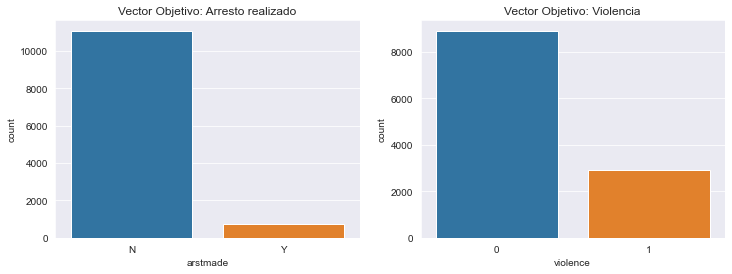

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax1 = sb.countplot(x='arstmade', data=df_unido, ax=ax[0]).set(title= 'Vector Objetivo: Arresto realizado')
ax2 = sb.countplot(x='violence', data=df_unido, ax=ax[1]).set(title= 'Vector Objetivo: Violencia')

In [14]:
for variable in df_unido[['violence','arstmade']]:
    cantidad_mayor = df_unido[variable].value_counts('')[0]
    cantidad_mayor_porc = round(df_unido[variable].value_counts('%')[0],2)*100
    cantidad_menor = df_unido[variable].value_counts('')[1]
    cantidad_menor_porc = round(df_unido[variable].value_counts('%')[1],2)*100
    if variable == 'arstmade':
        print('')
        print(f'Las detenciones SIN arresto son {cantidad_mayor} esto corresponde al {cantidad_mayor_porc}% de la muestra')
        print(f'Las detenciones CON arresto son {cantidad_menor} esto corresponde al {cantidad_menor_porc}% de la muestra')
        
    else:
        print(f'Las detenciones SIN violencia son: {cantidad_mayor} esto corresponde al {cantidad_mayor_porc}% de la muestra')
        print(f'Las detenciones CON violencia son: {cantidad_menor} esto corresponde al {cantidad_menor_porc}% de la muestra')

Las detenciones SIN violencia son: 8918 esto corresponde al 75.0% de la muestra
Las detenciones CON violencia son: 2907 esto corresponde al 25.0% de la muestra

Las detenciones SIN arresto son 11077 esto corresponde al 94.0% de la muestra
Las detenciones CON arresto son 748 esto corresponde al 6.0% de la muestra


### Inspección de los valores nulos de las variables.

Para comenzar la inspección se remplazan los valores vacios por NAN

Se cuentan los valores nulos por cada columna del dataset

In [15]:
for columna in df_unido.columns:
    if round(df_unido[columna].isnull().sum()/df_unido.shape[0],2) > 0: # arroja solo las variables con valores perdidos
        print(f'La columna {columna} tiene {df_unido[columna].isnull().sum()} valores perdidos, lo que equivale a un {round(df_unido[columna].isnull().sum()*100/df_unido.shape[0],2)}% del total.')

La columna trhsloc tiene 205 valores perdidos, lo que equivale a un 1.73% del total.
La columna arstoffn tiene 11078 valores perdidos, lo que equivale a un 93.68% del total.
La columna sumoffen tiene 11023 valores perdidos, lo que equivale a un 93.22% del total.
La columna officrid tiene 11664 valores perdidos, lo que equivale a un 98.64% del total.
La columna offverb tiene 9246 valores perdidos, lo que equivale a un 78.19% del total.
La columna offshld tiene 8575 valores perdidos, lo que equivale a un 72.52% del total.
La columna othfeatr tiene 11825 valores perdidos, lo que equivale a un 100.0% del total.
La columna rescode tiene 11825 valores perdidos, lo que equivale a un 100.0% del total.
La columna premtype tiene 11825 valores perdidos, lo que equivale a un 100.0% del total.
La columna premname tiene 1216 valores perdidos, lo que equivale a un 10.28% del total.
La columna addrnum tiene 6861 valores perdidos, lo que equivale a un 58.02% del total.
La columna stname tiene 6693 valo

**Comentarios:**
- Se determina eliminar variable con más de 60% de datos nulos.

In [16]:
fp.del_col(df_unido).columns

Index(['year', 'pct', 'ser_num', 'datestop', 'timestop', 'recstat', 'inout',
       'trhsloc', 'perobs', 'crimsusp', 'perstop', 'typeofid', 'explnstp',
       'othpers', 'arstmade', 'sumissue', 'compyear', 'comppct', 'offunif',
       'frisked', 'searched', 'contrabn', 'adtlrept', 'pistol', 'riflshot',
       'asltweap', 'knifcuti', 'machgun', 'othrweap', 'pf_hands', 'pf_wall',
       'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp',
       'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw',
       'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout',
       'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv',
       'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other',
       'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj',
       'sb_outln', 'sb_admis', 'sb_other', 'repcmd', 'revcmd', 'rf_furt',
       'rf_bulg', 'sex', 'race', 'dob', 'age', 'ht_feet', 'ht_inch', 'weight'

### Revisión de Atributos Geoespaciales:

In [17]:
mask = df_unido['year'] == 2009
df2k9 = df_unido[mask]
df2k10 = df_unido[~mask]

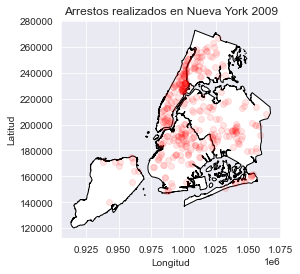

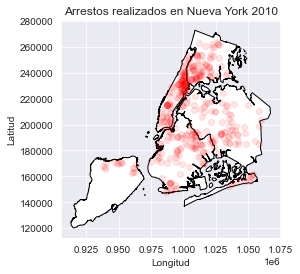

In [18]:
fp.map_arstmade(df2k9, '2009')
fp.map_arstmade(df2k10, '2010')

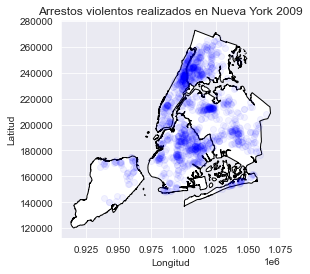

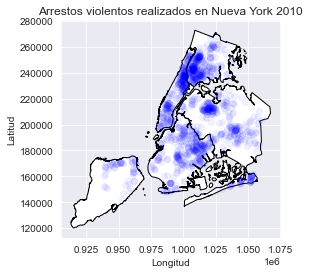

In [19]:
mask = df_unido['year'] == 2009
df2k9 = df_unido[mask]
df2k10 = df_unido[~mask]

fp.map_violence(df2k9, '2009')
fp.map_violence(df2k10, '2010')

**Comentarios:**
- La mayoría de los arrestos se presentan en Brooklyn, el Bronx y en Manhattan en la zona cercana al Bronx.
- Se observa que las zonas donde se realizan arrestos violentos son Manhattan en la zona cercana al Bronx, en el Bronx, zonas de Queens y Brooklyn en su mayoría.
- No se observan grandes diferencia entre las zonas donde se realizan arrestos entre los años, ni en los arrestos con violencia.

### Inspección de las variables físicas:

In [20]:
df_phys_atr = df_unido[['year', 'sex', 'race', 'dob', 'age', 'ht_feet', 'ht_inch', 'weight', 'haircolr',
                        'eyecolor', 'build', 'arstmade']]
df_phys_atr.head()

,year,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,arstmade
0,2009,M,B,7111984,24,5,9,145,BK,BR,M,N
1,2009,M,A,12151993,15,5,5,140,BK,BR,T,N
2,2009,M,Q,7031987,21,6,3,220,BR,BR,M,N
3,2009,M,B,3131986,22,5,5,120,BK,BR,T,N
4,2009,M,Q,9221991,18,5,6,165,BK,BR,M,N


In [21]:
fp.objeto_num(df_phys_atr, ['sex', 'race', 'haircolr', 'eyecolor', 'build', 'arstmade']).head()

,year,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,arstmade
0,2009,1,1,7111984,24,5,9,145,1,2,1,0
1,2009,1,0,12151993,15,5,5,140,1,2,2,0
2,2009,1,4,7031987,21,6,3,220,3,2,1,0
3,2009,1,1,3131986,22,5,5,120,1,2,2,0
4,2009,1,4,9221991,18,5,6,165,1,2,1,0


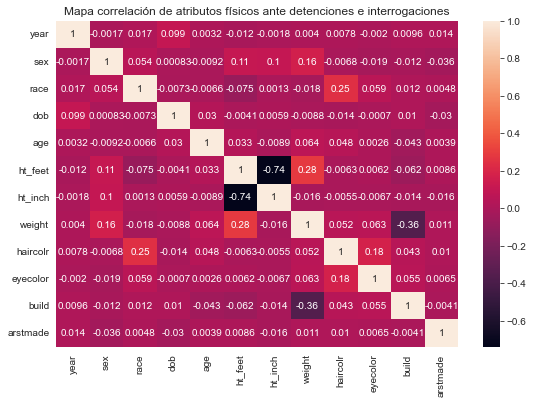

In [22]:
plt.figure(figsize=(9,6))
plt.title('Mapa correlación de atributos físicos ante detenciones e interrogaciones')
sb.heatmap(df_phys_atr.corr(), annot=True);

**Comentarios:**
- Se observa alta correlación entre la altura en pies y pulgadas, puede deberse a que son complementarias, se juntarán en el data set y serán convertidas a metros por ser las unidades métricas utilizadas en Chile.
- Se esperaba tener alta correlación entre la fecha de nacimiento y la edad, pero es solo de 0.03, lo que se debe al rango en que esta presentada la edad (1 a 999).

#### *Revisión de las edades:*

In [23]:
df_phys_atr.groupby(['year', 'age', 'dob']).count().head()
# Se analiza diferencia entre fecha de nacimiento y la edad tabulada, a presentar errores, se
# considera la edad a partir del año de nacimiento hasta el año de la detención.

sex  race  ht_feet  ht_inch  weight  haircolr  eyecolor  \
year age dob                                                                 
2009 1   12311900    3     3        3        3       3         3         3   
     2   8061988     1     1        1        1       1         1         1   
         10011987    1     1        1        1       1         1         1   
     5   1021993     1     1        1        1       1         1         1   
         7181979     1     1        1        1       1         1         1   

                   build  arstmade  
year age dob                        
2009 1   12311900      3         3  
     2   8061988       1         1  
         10011987      1         1  
     5   1021993       1         1  
         7181979       1         1

In [24]:
df_phys_atr.dob.info()

<class 'pandas.core.series.Series'>
Int64Index: 11825 entries, 0 to 6012
Series name: dob
Non-Null Count  Dtype
--------------  -----
11825 non-null  int64
dtypes: int64(1)
memory usage: 184.8 KB


In [25]:
fp.adj_age(df_phys_atr)
df_phys_atr.groupby(['adj_age', 'age'])['sex'].describe()

,,count,mean,std,min,25%,50%,75%,max
adj_age,age,,,,,,,,
11.0,11,1.0,1.000000,NaN,1.0,1.0,1.0,1.00,1.0
12.0,12,19.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
13.0,13,45.0,1.000000,0.213201,0.0,1.0,1.0,1.00,2.0
14.0,14,172.0,0.889535,0.332465,0.0,1.0,1.0,1.00,2.0
15.0,15,324.0,0.925926,0.315847,0.0,1.0,1.0,1.00,2.0
16.0,16,505.0,0.932673,0.294496,0.0,1.0,1.0,1.00,2.0
17.0,17,638.0,0.965517,0.266501,0.0,1.0,1.0,1.00,2.0
18.0,18,692.0,0.958092,0.245906,0.0,1.0,1.0,1.00,2.0
19.0,19,725.0,0.971034,0.258533,0.0,1.0,1.0,1.00,2.0


**Comentarios:**
- Se determina el rango de edad entre 11 y 99 ya que 11 años es la edad menor encontrada realmente en el dataset.
- Datos sin edad ni año de nacimiento real se determinan nulos.

#### *Conversión de la altura a metros:*

In [26]:
df2k9 = fp.height_cm(df2k9)
df2k9.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,violence,geometry,ht_cm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,2,P,Y,N,N,NaN,N,NaN,0,0,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,41,41,N,N,NaN,NaN,M,B,7111984,24,145,BK,BR,M,NaN,L,NaN,NaN,STREET,957,KELLY STREET,WESTCHESTER AVENUE,EAST 163 STREET,NaN,BRONX,NaN,NaN,41.0,G,7.0,NaN,1013067.0,238633.0,CM,1.0,20.0,0,POINT (1013067.000 238633.000),179.832
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,5,P,Y,Y,N,NaN,N,NaN,0,0,N,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,N,N,108,108,Y,N,V,S,M,A,12151993,15,140,BK,BR,T,NaN,L,NaN,NaN,STREET,NaN,NaN,63 STREET,37 AVENUE,NaN,QUEENS,NaN,NaN,108.0,J,NaN,NaN,1012043.0,212157.0,CM,1.0,14.0,0,POINT (1012043.000 212157.000),167.640
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,1,V,Y,N,N,NaN,N,NaN,0,0,N,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,43,43,Y,N,NaN,S,M,Q,7031987,21,220,BR,BR,M,NaN,L,NaN,NaN,STREET,NaN,NaN,WATSON AVENUE,WHEELER AVENUE,NaN,BRONX,NaN,NaN,43.0,E,NaN,NaN,1017599.0,240200.0,CM,1.0,20.0,0,POINT (1017599.000 240200.000),192.024
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,5,P,Y,N,N,NaN,N,NaN,0,0,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,77,77,N,N,NaN,NaN,M,B,3131986,22,120,BK,BR,T,NaN,L,NaN,NaN,STREET,249,SCHENECTADY AVENUE,LINCOLN PLACE,SAINT JOHNS PLACE,NaN,BROOKLYN,NaN,NaN,77.0,J,4.0,35.0,1002625.0,183442.0,CM,1.0,24.0,0,POINT (1002625.000 183442.000),167.640
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,10,P,Y,Y,N,NaN,N,NaN,0,0,Y,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,110,110,Y,Y,NaN,NaN,M,Q,9221991,18,165,BK,BR,M,NaN,L,NaN,NaN,SIDEWALK,NaN,NaN,53 AVENUE,108 STREET,NaN,QUEENS,NaN,NaN,110.0,H,NaN,NaN,1024535.0,209890.0,CM,1.0,20.0,0,POINT (1024535.000 209890.000),170.688


*Revisión de la contextura y del peso*

In [27]:
df2k9.groupby(['build', 'weight', 'ht_cm'])['sex'].describe().head()

count unique top freq
build weight ht_cm                        
H     1      170.688     1      1   F    1
      120    161.544     1      1   Z    1
             176.784     2      1   M    2
      130    167.640     2      2   F    1
      140    152.400     1      1   M    1

In [28]:
fp.adj_weight(df2k9).head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,violence,geometry,ht_cm,adj_weight
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,2,P,Y,N,N,NaN,N,NaN,0,0,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,41,41,N,N,NaN,NaN,M,B,7111984,24,BK,BR,M,NaN,L,NaN,NaN,STREET,957,KELLY STREET,WESTCHESTER AVENUE,EAST 163 STREET,NaN,BRONX,NaN,NaN,41.0,G,7.0,NaN,1013067.0,238633.0,CM,1.0,20.0,0,POINT (1013067.000 238633.000),179.832,145.0
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,5,P,Y,Y,N,NaN,N,NaN,0,0,N,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,N,N,108,108,Y,N,V,S,M,A,12151993,15,BK,BR,T,NaN,L,NaN,NaN,STREET,NaN,NaN,63 STREET,37 AVENUE,NaN,QUEENS,NaN,NaN,108.0,J,NaN,NaN,1012043.0,212157.0,CM,1.0,14.0,0,POINT (1012043.000 212157.000),167.640,140.0
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,1,V,Y,N,N,NaN,N,NaN,0,0,N,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,43,43,Y,N,NaN,S,M,Q,7031987,21,BR,BR,M,NaN,L,NaN,NaN,STREET,NaN,NaN,WATSON AVENUE,WHEELER AVENUE,NaN,BRONX,NaN,NaN,43.0,E,NaN,NaN,1017599.0,240200.0,CM,1.0,20.0,0,POINT (1017599.000 240200.000),192.024,220.0
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,5,P,Y,N,N,NaN,N,NaN,0,0,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,77,77,N,N,NaN,NaN,M,B,3131986,22,BK,BR,T,NaN,L,NaN,NaN,STREET,249,SCHENECTADY AVENUE,LINCOLN PLACE,SAINT JOHNS PLACE,NaN,BROOKLYN,NaN,NaN,77.0,J,4.0,35.0,1002625.0,183442.0,CM,1.0,24.0,0,POINT (1002625.000 183442.000),167.640,120.0
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,10,P,Y,Y,N,NaN,N,NaN,0,0,Y,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,110,110,Y,Y,NaN,NaN,M,Q,9221991,18,BK,BR,M,NaN,L,NaN,NaN,SIDEWALK,NaN,NaN,53 AVENUE,108 STREET,NaN,QUEENS,NaN,NaN,110.0,H,NaN,NaN,1024535.0,209890.0,CM,1.0,20.0,0,POINT (1024535.000 209890.000),170.688,165.0


**Comentarios:**
- Se determina dejar los pesos entre 90 y 690 libras ya que al revisar entre contextura, peso y altura, y la realidad de obesidad que presenta EEUU se podrían considerar pesos reales.

### Se calcula la probabilidad de que un individuo sea arrestado en uno de los cinco barrios acorde al género y la raza 

In [29]:
mask = df_unido['year'] == 2009
df2k9 = df_unido[mask]
df2k10 = df_unido[~mask]

df_test= df2k10[['arstmade', 'sex', 'race', 'city']]
df_train = df2k9[['arstmade', 'sex', 'race', 'city']]

X_train = df_train.drop(columns='arstmade')
X_test = df_test.drop(columns='arstmade')
y_train = df_train.arstmade
y_test = df_test.arstmade

In [30]:
df_train['arstmade'].value_counts()

N    5464
Y     348
Name: arstmade, dtype: int64

In [31]:
print(f'La probabilidad de que un individuo sea arrestado es: {348/(348+5464)*100:.2} %')

La probabilidad de que un individuo sea arrestado es: 6.0 %


In [32]:
arrest_city = df_train.groupby(['city', 'arstmade']).value_counts().unstack()
arrest_city

race                           A       B     I     P      Q    U      W     Z
city          arstmade sex                                                   
BRONX         N        F     1.0    29.0   NaN   3.0   26.0  NaN    3.0   4.0
                       M     9.0   386.0   1.0  88.0  245.0  5.0   33.0  25.0
                       Z     NaN     2.0   NaN   1.0    3.0  1.0    NaN  20.0
              Y        F     NaN     2.0   NaN   NaN    NaN  NaN    NaN   NaN
                       M     NaN    19.0   NaN   6.0   16.0  NaN    1.0   NaN
BROOKLYN      N        F     4.0    73.0   1.0   2.0   22.0  NaN   16.0   1.0
                       M    27.0  1281.0   6.0  52.0  285.0  7.0  155.0  16.0
                       Z     NaN     5.0   NaN   NaN    2.0  NaN    NaN  15.0
              Y        F     NaN    11.0   NaN   NaN    2.0  NaN    NaN   NaN
                       M     1.0    52.0   NaN   NaN   16.0  NaN    7.0   1.0
                       Z     NaN     NaN   NaN   NaN    NaN  NaN    NaN   1.0
MANHATTAN     N        F     3.0    33.0   NaN   5.0   15.0  NaN   12.0   1.0
                       M    21.0   547.0   2.0  92.0  267.0  9.0   48.0  16.0
                       Z     NaN     2.0   NaN   1.0    2.0  NaN    NaN   7.0
              Y        F     1.0     6.0   NaN   1.0    2.0  NaN    1.0   NaN
                       M     1.0    57.0   NaN   8.0   22.0  1.0    6.0   2.0
                       Z     NaN     NaN   NaN   NaN    NaN  1.0    NaN   1.0
QUEENS        N        F     9.0    23.0   1.0   2.0   19.0  1.0   13.0   2.0
                       M    94.0   448.0  10.0  54.0  397.0  8.0  134.0  20.0
                       Z     1.0     7.0   NaN   NaN    1.0  1.0    NaN   7.0
              Y        F     NaN     2.0   NaN   NaN    2.0  NaN    NaN   NaN
                       M     9.0    35.0   NaN   5.0   22.0  NaN   15.0   2.0
STATEN ISLAND N        F     1.0     7.0   NaN   NaN    4.0  NaN    8.0   NaN
                       M     5.0   125.0   NaN  10.0   35.0  3.0   75.0   1.0
              Y        M     NaN     5.0   NaN   NaN    1.0  NaN    5.0   NaN

**Comentarios:**
- Se observa que hombres de raza negra tienen la mayor probabilidad de ser arrestados, luego los hombres blancos hispanoaméricanos. Aunque la probabilidad de arresto es baja.

In [33]:
X = df_unido[['city','sex','race']]
y = np.where(df_unido['arstmade'] == 'Y',1,0)

In [34]:
prep= Pipeline(steps=[
            ('ci', CategoricalImputer(imputation_method='frequent')),
            ('oe', OrdinalEncoder(encoding_method = 'arbitrary'))
])
X_prep = prep.fit_transform(X)

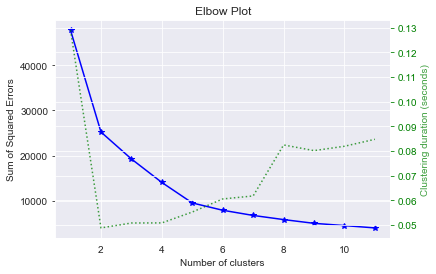

In [35]:
km = KMeans(random_state=42)
skplt.cluster.plot_elbow_curve(km, X_prep, cluster_ranges = range(1,12));

**Comentarios:**
- Se define el número de clusters como 5(número total de comunas dentro de la ciudad), donde se observa una disminución de la pendiente de la curva.

In [36]:
pipe= Pipeline(steps=[
    ('prep', prep),
    ('km', KMeans(n_clusters = 5, random_state=123))
])

cl_number = pipe.fit_predict(X)

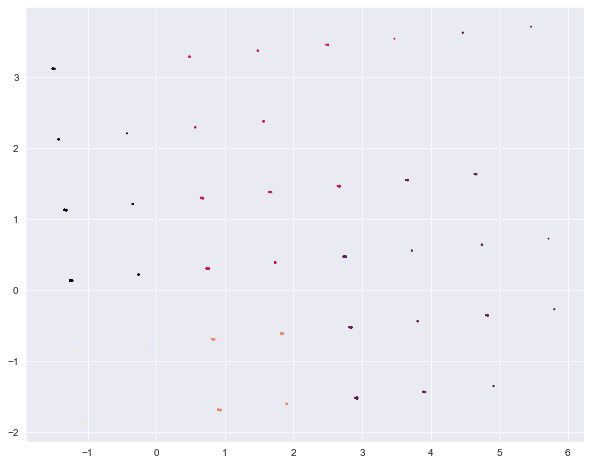

In [37]:
pca = PCA(n_components=3, random_state=123)
components = pca.fit_transform(X_prep)
plt.figure(figsize=(10,8))
plt.scatter(components[:,0], components[:,1],components[:,2], c=cl_number);

In [38]:
pd.Series(cl_number).value_counts()

0    4452
4    2241
2    2146
3    1969
1    1017
dtype: int64

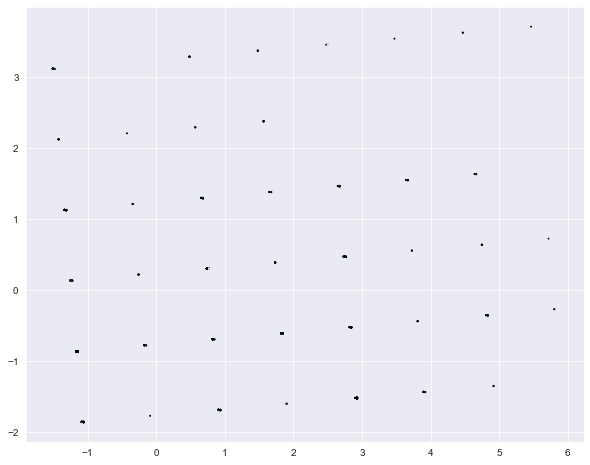

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(components[:,0], components[:,1],components[:,2], c=y);

In [40]:
gmm = GaussianMixture(n_components=5, random_state=123)
cl_number_gmm = gmm.fit_predict(X_prep)
cl_number_proba = gmm.predict_proba(X_prep)

In [41]:
pd.Series(cl_number_gmm).value_counts()

1    5917
3    4956
0     414
4     394
2     144
dtype: int64

## PREPROCESAMIENTO

In [130]:
df2k9 =  pd.read_csv('2009_1perc.csv', na_values=" ").drop('Unnamed: 0',axis=1)
df2k10 = pd.read_csv('2010_1perc.csv', na_values=" ").drop('Unnamed: 0',axis=1)
ds_merge = [df2k9,df2k10]
X = pd.concat(ds_merge)

In [43]:
X.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,2,P,Y,N,N,NaN,N,NaN,0,0,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,41,41,N,N,NaN,NaN,M,B,7111984,24,5,9,145,BK,BR,M,NaN,L,NaN,NaN,STREET,957,KELLY STREET,WESTCHESTER AVENUE,EAST 163 STREET,NaN,BRONX,NaN,NaN,41.0,G,7.0,NaN,1013067.0,238633.0,CM,1.0,20.0
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,5,P,Y,Y,N,NaN,N,NaN,0,0,N,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,N,N,108,108,Y,N,V,S,M,A,12151993,15,5,5,140,BK,BR,T,NaN,L,NaN,NaN,STREET,NaN,NaN,63 STREET,37 AVENUE,NaN,QUEENS,NaN,NaN,108.0,J,NaN,NaN,1012043.0,212157.0,CM,1.0,14.0
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,1,V,Y,N,N,NaN,N,NaN,0,0,N,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,43,43,Y,N,NaN,S,M,Q,7031987,21,6,3,220,BR,BR,M,NaN,L,NaN,NaN,STREET,NaN,NaN,WATSON AVENUE,WHEELER AVENUE,NaN,BRONX,NaN,NaN,43.0,E,NaN,NaN,1017599.0,240200.0,CM,1.0,20.0
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,5,P,Y,N,N,NaN,N,NaN,0,0,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,77,77,N,N,NaN,NaN,M,B,3131986,22,5,5,120,BK,BR,T,NaN,L,NaN,NaN,STREET,249,SCHENECTADY AVENUE,LINCOLN PLACE,SAINT JOHNS PLACE,NaN,BROOKLYN,NaN,NaN,77.0,J,4.0,35.0,1002625.0,183442.0,CM,1.0,24.0
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,10,P,Y,Y,N,NaN,N,NaN,0,0,Y,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,110,110,Y,Y,NaN,NaN,M,Q,9221991,18,5,6,165,BK,BR,M,NaN,L,NaN,NaN,SIDEWALK,NaN,NaN,53 AVENUE,108 STREET,NaN,QUEENS,NaN,NaN,110.0,H,NaN,NaN,1024535.0,209890.0,CM,1.0,20.0


In [131]:
ft_create_2obj = FunctionTransformer(fp.create_2obj)
ft_del_col = FunctionTransformer(fp.del_col)
ft_adj_age = FunctionTransformer(fp.adj_age)
ft_height_cm = FunctionTransformer(fp.height_cm)
ft_adj_weight = FunctionTransformer(fp.adj_weight)

prep = Pipeline([
    ('2vo', ft_create_2obj),
    ('age', ft_adj_age),
    ('height', ft_height_cm),
    ('weight', ft_adj_weight),
    ('del_nan', ft_del_col),
    ('cat_imp', CategoricalImputer(imputation_method='frequent')),
    ('num_imp', MeanMedianImputer(imputation_method='mean')),
    ('ohe', OneHotEncoder(drop_last=True))
])

df = prep.fit_transform(X)

In [132]:
mask = df['year'] == 2009
df['arstmade'] = df['arstmade_N']

X_train = df[mask].drop(columns=['arstmade','violence'])
X_test = df[~mask].drop(columns=['arstmade','violence'])

y_train = df[mask].arstmade
y_test = df[~mask].arstmade

X_train.shape

(5812, 10476)

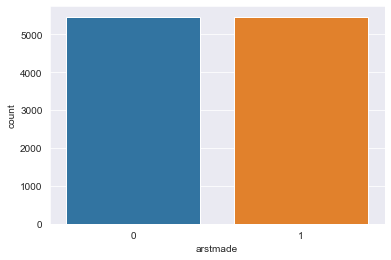

In [133]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

sb.countplot(x=y_train_res, data=X_train_res);

## Modelo predictivo, si procedimiento terminará en arresto o no

### 1.- Regresión logistica con Smote.

In [47]:
pipe_lr = Pipeline(steps=[
    ('sc', SklearnTransformerWrapper(StandardScaler(),variables=['adj_age','ht_cm','adj_weight'])), 
    ('model', LogisticRegression(C= 100,random_state=42,max_iter=10000))
])

fp.train_function(pipe_lr, X_train_res, X_test, y_train_res, y_test)

              precision    recall  f1-score   support

           0     0.5721    0.5944    0.5831      5464
           1     0.5780    0.5555    0.5665      5464

    accuracy                         0.5749     10928
   macro avg     0.5751    0.5749    0.5748     10928
weighted avg     0.5751    0.5749    0.5748     10928

              precision    recall  f1-score   support

           0     0.0827    0.5675    0.1443       400
           1     0.9470    0.5512    0.6968      5613

    accuracy                         0.5523      6013
   macro avg     0.5149    0.5594    0.4206      6013
weighted avg     0.8895    0.5523    0.6601      6013



Pipeline(steps=[('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['adj_age', 'ht_cm',
                                                      'adj_weight'])),
                ('model',
                 LogisticRegression(C=100, max_iter=10000, random_state=42))])

In [48]:
params = {'model__C': [150,120,100,90,80]}

search = GridSearchCV(pipe_lr, params, cv=5, scoring='accuracy')

search.fit(X_train_res,y_train_res)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc',
                                        SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                  variables=['adj_age',
                                                                             'ht_cm',
                                                                             'adj_weight'])),
                                       ('model',
                                        LogisticRegression(C=100,
                                                           max_iter=10000,
                                                           random_state=42))]),
             param_grid={'model__C': [150, 120, 100, 90, 80]},
             scoring='accuracy')

In [49]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.235041,0.939034,0.248546,0.001919,150,{'model__C': 150},0.572278,0.564044,0.558097,0.583066,0.553776,0.566252,0.010451,1
1,5.909465,0.520349,0.246895,0.001161,120,{'model__C': 120},0.572278,0.564044,0.558097,0.583066,0.553776,0.566252,0.010451,1
2,5.923327,0.514633,0.247450,0.001340,100,{'model__C': 100},0.572278,0.564044,0.558097,0.583066,0.553776,0.566252,0.010451,1
3,5.925883,0.512839,0.248471,0.002638,90,{'model__C': 90},0.572278,0.564044,0.558097,0.583066,0.553776,0.566252,0.010451,1
4,6.347035,0.858406,0.265294,0.022544,80,{'model__C': 80},0.572278,0.564044,0.558097,0.583066,0.553776,0.566252,0.010451,1


In [50]:
search.best_params_

{'model__C': 150}

In [51]:
search.best_estimator_

Pipeline(steps=[('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['adj_age', 'ht_cm',
                                                      'adj_weight'])),
                ('model',
                 LogisticRegression(C=150, max_iter=10000, random_state=42))])

In [52]:
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.0827    0.5675    0.1443       400
           1     0.9470    0.5512    0.6968      5613

    accuracy                         0.5523      6013
   macro avg     0.5149    0.5594    0.4206      6013
weighted avg     0.8895    0.5523    0.6601      6013



### 2.- SVC

In [53]:
pipe_SVC = Pipeline(steps=[
    ('sc', SklearnTransformerWrapper(StandardScaler(),variables=['adj_age','ht_cm','adj_weight'])), 
    ('model', SVC(random_state=42))
])

fp.train_function(pipe_SVC, X_train_res, X_test, y_train_res, y_test)

              precision    recall  f1-score   support

           0     0.5353    0.3400    0.4159      5464
           1     0.5164    0.7048    0.5961      5464

    accuracy                         0.5224     10928
   macro avg     0.5259    0.5224    0.5060     10928
weighted avg     0.5259    0.5224    0.5060     10928

              precision    recall  f1-score   support

           0     0.0760    0.3575    0.1253       400
           1     0.9378    0.6902    0.7952      5613

    accuracy                         0.6681      6013
   macro avg     0.5069    0.5238    0.4602      6013
weighted avg     0.8805    0.6681    0.7506      6013



Pipeline(steps=[('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['adj_age', 'ht_cm',
                                                      'adj_weight'])),
                ('model', SVC(random_state=42))])

### 3.- Árbol de decisión

In [54]:
pipe_dt = Pipeline(steps=[
    ('sc', SklearnTransformerWrapper(StandardScaler(),variables=['adj_age','ht_cm','adj_weight'])), 
    ('model', DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=0.1, ccp_alpha = 5))
])

fp.train_function(pipe_dt, X_train_res, X_test, y_train_res, y_test)

              precision    recall  f1-score   support

           0     0.5000    1.0000    0.6667      5464
           1     0.0000    0.0000    0.0000      5464

    accuracy                         0.5000     10928
   macro avg     0.2500    0.5000    0.3333     10928
weighted avg     0.2500    0.5000    0.3333     10928

              precision    recall  f1-score   support

           0     0.0665    1.0000    0.1247       400
           1     0.0000    0.0000    0.0000      5613

    accuracy                         0.0665      6013
   macro avg     0.0333    0.5000    0.0624      6013
weighted avg     0.0044    0.0665    0.0083      6013



Pipeline(steps=[('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['adj_age', 'ht_cm',
                                                      'adj_weight'])),
                ('model',
                 DecisionTreeClassifier(ccp_alpha=5, max_depth=10,
                                        min_samples_leaf=0.1,
                                        random_state=42))])

### 4.- Bagging Classifier - Regresión logística

In [56]:
pipe_bg = Pipeline(steps=[
    ('sc', SklearnTransformerWrapper(StandardScaler(),variables=['adj_age','ht_cm','adj_weight'])),
    ('model', BaggingClassifier(base_estimator = LogisticRegression(max_iter=10000,C=100),
                                random_state= 42, n_estimators=20, n_jobs = -1,
                                max_samples= 0.8,
                                max_features= 0.6
                                ))
])

fp.train_function(pipe_bg, X_train_res, X_test, y_train_res, y_test)

/Users/rociogonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0     0.8033    0.8865    0.8429      5464
           1     0.8734    0.7829    0.8257      5464

    accuracy                         0.8347     10928
   macro avg     0.8384    0.8347    0.8343     10928
weighted avg     0.8384    0.8347    0.8343     10928

              precision    recall  f1-score   support

           0     0.1583    0.5700    0.2478       400
           1     0.9624    0.7841    0.8641      5613

    accuracy                         0.7698      6013
   macro avg     0.5604    0.6770    0.5560      6013
weighted avg     0.9089    0.7698    0.8231      6013



Pipeline(steps=[('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['adj_age', 'ht_cm',
                                                      'adj_weight'])),
                ('model',
                 BaggingClassifier(base_estimator=LogisticRegression(C=100,
                                                                     max_iter=10000),
                                   max_features=0.6, max_samples=0.8,
                                   n_estimators=20, n_jobs=-1,
                                   random_state=42))])

In [57]:
params = {'model__base_estimator':[LinearDiscriminantAnalysis()],
        'model__n_estimators': [1,5,10,15,20,25],
        'model__max_samples': [0.05, 0.1, 0.2, 0.5]}

search = GridSearchCV(pipe_bg, params, cv=5, scoring='accuracy')

search.fit(X_train_res,y_train_res)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc',
                                        SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                  variables=['adj_age',
                                                                             'ht_cm',
                                                                             'adj_weight'])),
                                       ('model',
                                        BaggingClassifier(base_estimator=LogisticRegression(C=100,
                                                                                            max_iter=10000),
                                                          max_features=0.6,
                                                          max_samples=0.8,
                                                          n_estimators=20,
                                                          n_jobs=-1,
                                                          random_state=42))]),
             param_grid={'model__base_estimator': [LinearDiscriminantAnalysis()],
                         'model__max_samples': [0.05, 0.1, 0.2, 0.5],
                         'model__n_estimators': [1, 5, 10, 15, 20, 25]},
             scoring='accuracy')

In [58]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__base_estimator,param_model__max_samples,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.879790,0.072263,0.278306,0.003921,LinearDiscriminantAnalysis(),0.05,1,{'model__base_estimator': LinearDiscriminantAn...,0.808783,0.726441,0.785453,0.747826,0.763844,0.766470,0.028662,24
1,7.365748,0.288004,0.727045,0.041379,LinearDiscriminantAnalysis(),0.05,5,{'model__base_estimator': LinearDiscriminantAn...,0.812443,0.832113,0.849497,0.825629,0.840732,0.832083,0.012692,23
2,10.683259,0.076524,0.980284,0.048908,LinearDiscriminantAnalysis(),0.05,10,{'model__base_estimator': LinearDiscriminantAn...,0.844007,0.872827,0.858188,0.882380,0.855378,0.862556,0.013514,21
3,12.479453,0.074383,1.017839,0.020692,LinearDiscriminantAnalysis(),0.05,15,{'model__base_estimator': LinearDiscriminantAn...,0.844007,0.882434,0.858188,0.891533,0.884668,0.872166,0.018028,19
4,15.342991,0.226547,1.113794,0.006399,LinearDiscriminantAnalysis(),0.05,20,{'model__base_estimator': LinearDiscriminantAn...,0.844007,0.888838,0.866880,0.898856,0.885584,0.876833,0.019402,18
5,18.670798,0.967458,1.161258,0.017463,LinearDiscriminantAnalysis(),0.05,25,{'model__base_estimator': LinearDiscriminantAn...,0.846295,0.887466,0.868253,0.906178,0.891533,0.879945,0.020727,17
6,4.655702,0.163822,0.308508,0.008656,LinearDiscriminantAnalysis(),0.1,1,{'model__base_estimator': LinearDiscriminantAn...,0.811985,0.862306,0.865050,0.838444,0.885126,0.852582,0.025128,22
7,13.083527,0.101916,0.887030,0.010490,LinearDiscriminantAnalysis(),0.1,5,{'model__base_estimator': LinearDiscriminantAn...,0.838518,0.919030,0.925435,0.916247,0.917620,0.903370,0.032578,16
8,23.725629,0.433854,0.869875,0.102179,LinearDiscriminantAnalysis(),0.1,10,{'model__base_estimator': LinearDiscriminantAn...,0.850869,0.937786,0.952882,0.945080,0.953776,0.928079,0.039039,14
9,30.259933,0.156066,1.031690,0.042897,LinearDiscriminantAnalysis(),0.1,15,{'model__base_estimator': LinearDiscriminantAn...,0.856359,0.951052,0.955169,0.952860,0.952860,0.933660,0.038673,12


In [59]:
search.best_params_

{'model__base_estimator': LinearDiscriminantAnalysis(),
 'model__max_samples': 0.5,
 'model__n_estimators': 25}

In [60]:
search.best_estimator_

Pipeline(steps=[('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['adj_age', 'ht_cm',
                                                      'adj_weight'])),
                ('model',
                 BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(),
                                   max_features=0.6, max_samples=0.5,
                                   n_estimators=25, n_jobs=-1,
                                   random_state=42))])

In [61]:
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.4264    0.2100    0.2814       400
           1     0.9457    0.9799    0.9625      5613

    accuracy                         0.9287      6013
   macro avg     0.6860    0.5949    0.6219      6013
weighted avg     0.9111    0.9287    0.9172      6013



### 5.- Random Forest Classifier

In [134]:
pipe_rf = Pipeline(steps=[
    ('sc', SklearnTransformerWrapper(StandardScaler(),variables=['adj_age','ht_cm','adj_weight'])),
    ('model', RandomForestClassifier(random_state=123, n_estimators=300, max_depth =10, n_jobs = -1))
])

fp.train_function(pipe_rf, X_train_res, X_test, y_train_res, y_test)

              precision    recall  f1-score   support

           0     0.9994    0.9791    0.9892      5464
           1     0.9796    0.9995    0.9894      5464

    accuracy                         0.9893     10928
   macro avg     0.9895    0.9893    0.9893     10928
weighted avg     0.9895    0.9893    0.9893     10928

              precision    recall  f1-score   support

           0     0.9658    0.6350    0.7662       400
           1     0.9746    0.9984    0.9864      5613

    accuracy                         0.9742      6013
   macro avg     0.9702    0.8167    0.8763      6013
weighted avg     0.9740    0.9742    0.9717      6013



Pipeline(steps=[('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['adj_age', 'ht_cm',
                                                      'adj_weight'])),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=300,
                                        n_jobs=-1, random_state=123))])

In [98]:
modelo = pipe_rf.fit(X_train_res,y_train_res)

### 6.- AdaBoostClassifier - Regresión Logística

In [63]:
pipe_adb_dt = Pipeline(steps=[
    ('sc', SklearnTransformerWrapper(StandardScaler(),variables=['adj_age','ht_cm','adj_weight'])),
    ('model', AdaBoostClassifier(base_estimator=LogisticRegression(C=1,max_iter=10000), 
                                random_state = 123,
                                n_estimators = 100, 
                                learning_rate=1 ))
                                ])

fp.train_function(pipe_adb_dt, X_train_res, X_test, y_train_res, y_test)

              precision    recall  f1-score   support

           0     0.5561    0.5926    0.5738      5464
           1     0.5640    0.5269    0.5448      5464

    accuracy                         0.5598     10928
   macro avg     0.5600    0.5598    0.5593     10928
weighted avg     0.5600    0.5598    0.5593     10928

              precision    recall  f1-score   support

           0     0.0802    0.5775    0.1408       400
           1     0.9460    0.5277    0.6775      5613

    accuracy                         0.5310      6013
   macro avg     0.5131    0.5526    0.4091      6013
weighted avg     0.8884    0.5310    0.6418      6013



Pipeline(steps=[('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['adj_age', 'ht_cm',
                                                      'adj_weight'])),
                ('model',
                 AdaBoostClassifier(base_estimator=LogisticRegression(C=1,
                                                                      max_iter=10000),
                                    learning_rate=1, n_estimators=100,
                                    random_state=123))])

## Modelo predictivo, si arresto terminará en violencia o no

* Se consideran solo los datos con arresto.

In [64]:
df['arstmade'] = df['arstmade_N']

#mask_arr = df['arstmade'] == 1
#df = df[~mask_arr]

mask_year = df['year'] == 2009

X_train = df[mask_year].drop(columns=['arstmade','violence'])
X_test = df[~mask_year].drop(columns=['arstmade','violence'])

y_train = df[mask_year].violence
y_test = df[~mask_year].violence

X_train.shape,y_train.shape, X_test.shape,y_test.shape

((5812, 10476), (5812,), (6013, 10476), (6013,))

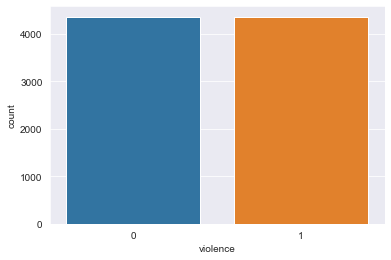

In [65]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

sb.countplot(x=y_train_res, data=X_train_res);

In [66]:
X_train_res.shape

(8718, 10476)

### 1.- Regresión logística

In [67]:
pipe_lr = Pipeline(steps=[
    ('sc', SklearnTransformerWrapper(StandardScaler(),variables=['adj_age','ht_cm','adj_weight'])), 
    ('model', LogisticRegression(random_state=42,max_iter=10000))
])

fp.train_function(pipe_lr, X_train_res, X_test, y_train_res, y_test)

              precision    recall  f1-score   support

           0     0.5286    0.5749    0.5508      4359
           1     0.5341    0.4873    0.5096      4359

    accuracy                         0.5311      8718
   macro avg     0.5313    0.5311    0.5302      8718
weighted avg     0.5313    0.5311    0.5302      8718

              precision    recall  f1-score   support

           0     0.8015    0.5650    0.6628      4559
           1     0.2915    0.5612    0.3837      1454

    accuracy                         0.5641      6013
   macro avg     0.5465    0.5631    0.5233      6013
weighted avg     0.6782    0.5641    0.5953      6013



Pipeline(steps=[('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['adj_age', 'ht_cm',
                                                      'adj_weight'])),
                ('model', LogisticRegression(max_iter=10000, random_state=42))])

### 2.- Gradient Boosting Classifier 

In [68]:
pipe_gbc = Pipeline(steps=[
    ('sc', SklearnTransformerWrapper(StandardScaler(),variables=['adj_age','ht_cm','adj_weight'])),
    ('model', GradientBoostingClassifier(n_estimators=20, 
                                        learning_rate=0.5, 
                                        max_depth=3, 
                                        random_state=42, 
                                        ccp_alpha=0.5))
])

fp.train_function(pipe_lr, X_train_res, X_test, y_train_res, y_test)

              precision    recall  f1-score   support

           0     0.5286    0.5749    0.5508      4359
           1     0.5341    0.4873    0.5096      4359

    accuracy                         0.5311      8718
   macro avg     0.5313    0.5311    0.5302      8718
weighted avg     0.5313    0.5311    0.5302      8718

              precision    recall  f1-score   support

           0     0.8015    0.5650    0.6628      4559
           1     0.2915    0.5612    0.3837      1454

    accuracy                         0.5641      6013
   macro avg     0.5465    0.5631    0.5233      6013
weighted avg     0.6782    0.5641    0.5953      6013



Pipeline(steps=[('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['adj_age', 'ht_cm',
                                                      'adj_weight'])),
                ('model', LogisticRegression(max_iter=10000, random_state=42))])

In [69]:
params = {'model__n_estimators': [10,30,40,50],
            'model__max_depth': [1,2,4,5],
            'model__learning_rate': [0.1,0.01,0.001,0.0001],
            'model__ccp_alpha': [0.05,0.1,0.3]}

search = GridSearchCV(pipe_gbc, params, cv=5, scoring='accuracy')
search

search.fit(X_train_res,y_train_res)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc',
                                        SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                  variables=['adj_age',
                                                                             'ht_cm',
                                                                             'adj_weight'])),
                                       ('model',
                                        GradientBoostingClassifier(ccp_alpha=0.5,
                                                                   learning_rate=0.5,
                                                                   n_estimators=20,
                                                                   random_state=42))]),
             param_grid={'model__ccp_alpha': [0.05, 0.1, 0.3],
                         'model__learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'model__max_depth': [1, 2, 4, 5],
                         'model__n_estimators': [10, 30, 40, 50]},
             scoring='accuracy')

In [70]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__ccp_alpha,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.436860,0.386028,0.261480,0.030996,0.05,0.1,1,10,"{'model__ccp_alpha': 0.05, 'model__learning_ra...",0.942087,0.959289,0.994266,0.993115,0.991968,0.976145,0.021498,1
1,4.487089,0.029568,0.241697,0.002355,0.05,0.1,1,30,"{'model__ccp_alpha': 0.05, 'model__learning_ra...",0.942087,0.959289,0.994266,0.993115,0.991968,0.976145,0.021498,1
2,5.600993,0.034057,0.243112,0.001355,0.05,0.1,1,40,"{'model__ccp_alpha': 0.05, 'model__learning_ra...",0.942087,0.959289,0.994266,0.993115,0.991968,0.976145,0.021498,1
3,6.808008,0.034619,0.248058,0.003917,0.05,0.1,1,50,"{'model__ccp_alpha': 0.05, 'model__learning_ra...",0.942087,0.959289,0.994266,0.993115,0.991968,0.976145,0.021498,1
4,2.782595,0.069870,0.246749,0.003848,0.05,0.1,2,10,"{'model__ccp_alpha': 0.05, 'model__learning_ra...",0.942087,0.959289,0.994266,0.993115,0.991968,0.976145,0.021498,1
5,6.283402,0.132000,0.245008,0.002478,0.05,0.1,2,30,"{'model__ccp_alpha': 0.05, 'model__learning_ra...",0.942087,0.959289,0.994266,0.993115,0.991968,0.976145,0.021498,1
6,8.013716,0.129191,0.243705,0.001188,0.05,0.1,2,40,"{'model__ccp_alpha': 0.05, 'model__learning_ra...",0.942087,0.959289,0.994266,0.993115,0.991968,0.976145,0.021498,1
7,9.739332,0.122954,0.244081,0.000945,0.05,0.1,2,50,"{'model__ccp_alpha': 0.05, 'model__learning_ra...",0.942087,0.959289,0.994266,0.993115,0.991968,0.976145,0.021498,1
8,3.574546,0.097898,0.244690,0.001197,0.05,0.1,4,10,"{'model__ccp_alpha': 0.05, 'model__learning_ra...",0.942087,0.959289,0.994266,0.993115,0.991968,0.976145,0.021498,1
9,8.695026,0.222366,0.243486,0.000871,0.05,0.1,4,30,"{'model__ccp_alpha': 0.05, 'model__learning_ra...",0.942087,0.959289,0.994266,0.993115,0.991968,0.976145,0.021498,1


In [71]:
search.best_params_

{'model__ccp_alpha': 0.05,
 'model__learning_rate': 0.1,
 'model__max_depth': 1,
 'model__n_estimators': 10}

In [72]:
search.best_estimator_

Pipeline(steps=[('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['adj_age', 'ht_cm',
                                                      'adj_weight'])),
                ('model',
                 GradientBoostingClassifier(ccp_alpha=0.05, max_depth=1,
                                            n_estimators=10,
                                            random_state=42))])

In [73]:
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9622    1.0000    0.9807      4559
           1     1.0000    0.8769    0.9344      1454

    accuracy                         0.9702      6013
   macro avg     0.9811    0.9384    0.9576      6013
weighted avg     0.9714    0.9702    0.9695      6013



### 3.- AdaBoostClassifier con DecisionTreeClassifier

In [97]:
pipe_adb_rf = Pipeline(steps = [
    ('sc', SklearnTransformerWrapper(StandardScaler(),variables=['adj_age','ht_cm','adj_weight'])),
    ('model', AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1), 
                                random_state = 42,
                                n_estimators = 10, 
                                learning_rate=0.5))
                                ])

fp.train_function(pipe_adb_rf, X_train_res, X_test, y_train_res, y_test)

              precision    recall  f1-score   support

           0     0.8955    0.9534    0.9236      4359
           1     0.9502    0.8887    0.9184      4359

    accuracy                         0.9211      8718
   macro avg     0.9229    0.9211    0.9210      8718
weighted avg     0.9229    0.9211    0.9210      8718

              precision    recall  f1-score   support

           0     0.8963    0.9500    0.9224      4559
           1     0.8069    0.6554    0.7233      1454

    accuracy                         0.8788      6013
   macro avg     0.8516    0.8027    0.8229      6013
weighted avg     0.8747    0.8788    0.8742      6013



Pipeline(steps=[('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['adj_age', 'ht_cm',
                                                      'adj_weight'])),
                ('model',
                 AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1),
                                    learning_rate=0.5, n_estimators=10,
                                    random_state=42))])

### 4.- Regresión logística con algoritmo de reducción de dimensionalidad

In [164]:
pipe_dr_lg = Pipeline(steps=[
    ('sc', SklearnTransformerWrapper(StandardScaler(),variables=['adj_age','ht_cm','adj_weight'])),
    ('dr', LinearDiscriminantAnalysis()),
    ('model', LogisticRegression(random_state=42))])

fp.train_function(pipe_dr_lg, X_train_res, X_test, y_train_res, y_test)

In [89]:
params = {'model__C': [150,120,100,90,80]}

search = GridSearchCV(pipe_dr_lg, params, cv=5, scoring='accuracy')

search.fit(X_train_res,y_train_res)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc',
                                        SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                  variables=['adj_age',
                                                                             'ht_cm',
                                                                             'adj_weight'])),
                                       ('dr', LinearDiscriminantAnalysis()),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             param_grid={'model__C': [150, 120, 100, 90, 80]},
             scoring='accuracy')

In [90]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,135.841807,5.162601,0.295297,0.007225,150,{'model__C': 150},0.816514,0.895642,0.927752,0.917958,0.932301,0.898033,0.042675,1
1,140.993635,5.376784,0.285708,0.009812,120,{'model__C': 120},0.816514,0.895642,0.927752,0.917958,0.932301,0.898033,0.042675,1
2,146.727472,2.847934,0.278266,0.004748,100,{'model__C': 100},0.816514,0.895642,0.927752,0.917958,0.932301,0.898033,0.042675,1
3,147.410545,3.210353,0.277023,0.005658,90,{'model__C': 90},0.816514,0.895642,0.927752,0.917958,0.932301,0.898033,0.042675,1
4,149.051124,4.219688,0.279621,0.010983,80,{'model__C': 80},0.816514,0.895642,0.927752,0.917958,0.932301,0.898033,0.042675,1


In [91]:
search.best_params_

{'model__C': 150}

In [92]:
search.best_estimator_

Pipeline(steps=[('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['adj_age', 'ht_cm',
                                                      'adj_weight'])),
                ('dr', LinearDiscriminantAnalysis()),
                ('model', LogisticRegression(C=150, random_state=42))])

In [163]:
best_model_dr_lg = search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test,y_pred, digits=4))

ValueError: The number of columns in this dataset is different from the one used to fit this transformer (when using the fit() method).

**Comentarios:**
- Al aplicar la reducción de dimensionalidad se observa gran mejora en el modelo de regresión logística, LDA permite definir de mejor forma las clases.
- Al cambiar el valor del hiperparámetro C de la regresión logística no se observan grandes mejoras en el desempeño del modelo, se sigue observando un modelo sobreajustado. 

### 5.1- Voting

In [81]:
clf1 = LogisticRegression(random_state=42)
clf2= RandomForestClassifier(random_state=42)
clf3= DecisionTreeClassifier(random_state=42)

In [82]:
pipe_vc = Pipeline(steps = [ 
    ('sc', SklearnTransformerWrapper(StandardScaler(),variables=['adj_age','ht_cm','adj_weight'])),
    ('model', VotingClassifier([('lr', clf1), ('rf', clf2), ('dt', clf3)], n_jobs = -1))
])

fp.train_function(pipe_vc, X_train_res, X_test, y_train_res, y_test)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      4359
           1     1.0000    1.0000    1.0000      4359

    accuracy                         1.0000      8718
   macro avg     1.0000    1.0000    1.0000      8718
weighted avg     1.0000    1.0000    1.0000      8718

              precision    recall  f1-score   support

           0     0.9708    0.9912    0.9809      4559
           1     0.9705    0.9065    0.9374      1454

    accuracy                         0.9707      6013
   macro avg     0.9707    0.9488    0.9592      6013
weighted avg     0.9707    0.9707    0.9704      6013



Pipeline(steps=[('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['adj_age', 'ht_cm',
                                                      'adj_weight'])),
                ('model',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(random_state=42)),
                                              ('svm',
                                               RandomForestClassifier(random_state=42)),
                                              ('dt',
                                               DecisionTreeClassifier(random_state=42))],
                                  n_jobs=-1))])

### 5.2- Voting

In [87]:
clf1 = LinearDiscriminantAnalysis()
clf2= RandomForestClassifier(random_state=42)
clf3= LogisticRegression(random_state=42)

In [88]:
pipe_vc = Pipeline(steps = [ 
    ('sc', SklearnTransformerWrapper(StandardScaler(),variables=['adj_age','ht_cm','adj_weight'])),
    ('model', VotingClassifier([('lda', clf1), ('rf', clf2), ('lg', clf3)], voting = 'hard'))
])

fp.train_function(pipe_vc, X_train_res, X_test, y_train_res, y_test)

              precision    recall  f1-score   support

           0     0.9966    1.0000    0.9983      4359
           1     1.0000    0.9966    0.9983      4359

    accuracy                         0.9983      8718
   macro avg     0.9983    0.9983    0.9983      8718
weighted avg     0.9983    0.9983    0.9983      8718

              precision    recall  f1-score   support

           0     0.9453    0.9585    0.9519      4559
           1     0.8640    0.8260    0.8446      1454

    accuracy                         0.9265      6013
   macro avg     0.9047    0.8923    0.8982      6013
weighted avg     0.9256    0.9265    0.9259      6013



Pipeline(steps=[('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['adj_age', 'ht_cm',
                                                      'adj_weight'])),
                ('model',
                 VotingClassifier(estimators=[('lda',
                                               LinearDiscriminantAnalysis()),
                                              ('rf',
                                               RandomForestClassifier(random_state=42)),
                                              ('dt',
                                               LogisticRegression(random_state=42))]))])

**Comentarios:**
- Al utilizar VotingClassifier con Regresión Logística, Random Forest y Árbol de Decisión se observa que entrega un modelo sobreajustado a los datos de entrenamiento, por lo que se modifican los modelos y se reemplaza el Árbol de Decisión por Linear Discriminant entregando mejores resultados.

## Serialización de Modelos

Modelo Arresto

RandomForestClassifier

In [160]:
from joblib import dump, load

df2k9 =  pd.read_csv('2009_1perc.csv', na_values=" ").drop('Unnamed: 0',axis=1)
df2k10 = pd.read_csv('2010_1perc.csv', na_values=" ").drop('Unnamed: 0',axis=1)



X_train = df2k9.drop(columns = ['arstmade'])
y_train = df2k9.arstmade
X_test = df2k10.drop(columns = ['arstmade'])
y_test = df2k10.arstmade

modelo_rf = pipe_rf.fit(X_train_res, y_train_res)
dump(modelo_rf, 'Modelo_arresto_rf_smote.joblib')


['Modelo_arresto_rf_smote.joblib']

In [161]:
Modelo_sm = load('Modelo_arresto_rf.joblib')
y_pred= Modelo_sm.predict(X_test)

In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.93      1.00      0.97      5613
           Y       0.00      0.00      0.00       400

    accuracy                           0.93      6013
   macro avg       0.47      0.50      0.48      6013
weighted avg       0.87      0.93      0.90      6013



Violencia

In [162]:
modelo = best_model_dr_lg.fit(X_train_res,y_train_res)
dump(modelo_rf, 'Modelo_violencia.joblib')

NameError: name 'best_model_dr_lg' is not defined